# Logistic Regression Example with SckLearn Kit

Logistic Regression is a predictive analysis technique used when a dependent variable is dfits into discrete categories (multiclass). The logistic model is used to estimate the probability of a binary response based on one or more predictor (or independent) variables (features). It allows one to say that the presence of a risk factor increases the odds of a given outcome by a specific factor.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scikit_utilities as ut

from sklearn.linear_model import LogisticRegression

### Get the Iris Data

In [3]:
X_train_std, y_train, X_test_std, y_test, X_combined_std, y_combined = ut.get_iris_data()

[0 1 2]
Training Data set is 105 values long


### Perform Logistic regression

In [4]:
lr = LogisticRegression(C=1000.0, random_state =0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Plot Decison Regions

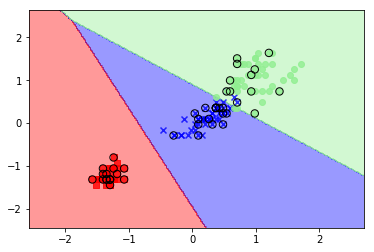

In [5]:
plt = ut.plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx=range(105, 150))
plt.show()

### Predict class memebership probability

In [6]:
lr.predict_proba(X_test_std[0,:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

### Adding Regularisation

Overfitting is a common problem in ML, where a model fits a training set very well but fails to generalise to new data. When a model __OVERFITS__ we say it has __HIGH VARIANCE__.
This is often caused by an overly complicated model for the underlying data. 
Simialrly we can have models that __UNDERFIT__ (these models have __HIGH BIAS__) which means the model is not complex enough to capture the pattern in the underlying data. 

We often seek to get a good __BIAS-VARIANCE__ tradeoff for ML models, tuning the complexity of the models to capture the optimum ammount of underlying pattern. A method often used for this is __regularisation__. Regularisation is used to handle high correlation between feayuires, filter out noise and prevent overfitting. It introduces extra information or bias to penalise extreme paramter weights. __L2__ regularisation is often used. It is added as a term to the cost function. It allows control on how well the model fits the training data by keeping the weights small.

Lets fit 10 Logistic Regression models with different Inverse regularisation parameter values c (class 2 v all for illustration)

In [8]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10**c, random_state =0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

In [14]:
weights = np.array(weights)

In [ ]:
### Plot the Weight 

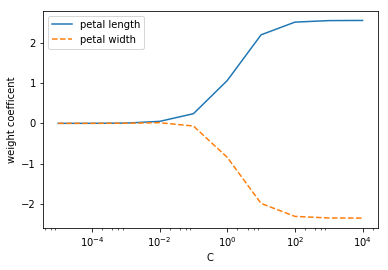

In [17]:
plt.plot(params, weights[:,0],label='petal length')
plt.plot(params, weights[:,1],linestyle='--', label='petal width')
plt.ylabel('weight coefficent')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

Increasing the Regularisation strength (decreasing C) the weigh coefficents shrink 